# Deep Learning Midterm Project : Gender and Age Recognition from Facial Images using CNN

### Name: Prachi Khatri
### Student ID: N01578832

Importing all necessary libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
# style.use('dark_background')

In [2]:
# Defining the Path for loading the images
path = Path("./UTKFace")
filenames = [file.name for file in path.glob('*.jpg')]

In [3]:
# Chechking the number of images
print(len(filenames))

# Checking if the images are stored in the list and displaying the first 3 filenames
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


In [4]:
# Shuffling the filenames
np.random.seed(10)
np.random.shuffle(filenames)

# Extracting age and gender labels from filenames
image_paths = [str(file) for file in filenames]  # Convert Path objects to strings
age_labels = [file.split('_')[0] for file in filenames]
gender_labels = [file.split('_')[1] for file in filenames]

In [5]:
# Checking the filenames
image_paths[:3]

['23_1_2_20170116172910708.jpg.chip.jpg',
 '28_0_1_20170113150719161.jpg.chip.jpg',
 '26_1_0_20170116234741431.jpg.chip.jpg']

In [6]:
# Creating the dataset in a proper format
df = pd.DataFrame({
    'image': image_paths,
    'age': age_labels,
    'gender': gender_labels
})

In [7]:
df.head()

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0


In [8]:
#Checking the datatype
df.dtypes

image     object
age       object
gender    object
dtype: object

In [9]:
# Changing the data type of the columns age and gender 
df = df.astype({'age':'float32', 'gender': 'int32'})

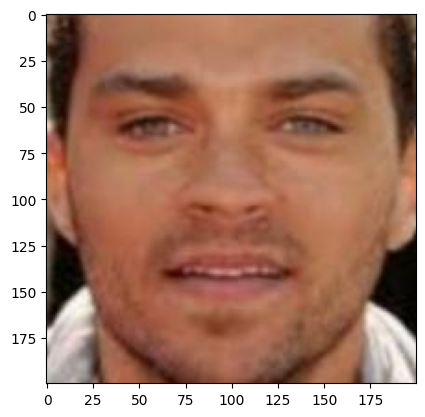

In [10]:
# Display of one image
img = Image.open("./UTKFace/" + df['image'][1])
plt.imshow(img)
plt.show()

In [11]:
! pip install --upgrade keras

# To visualize a subset of images 

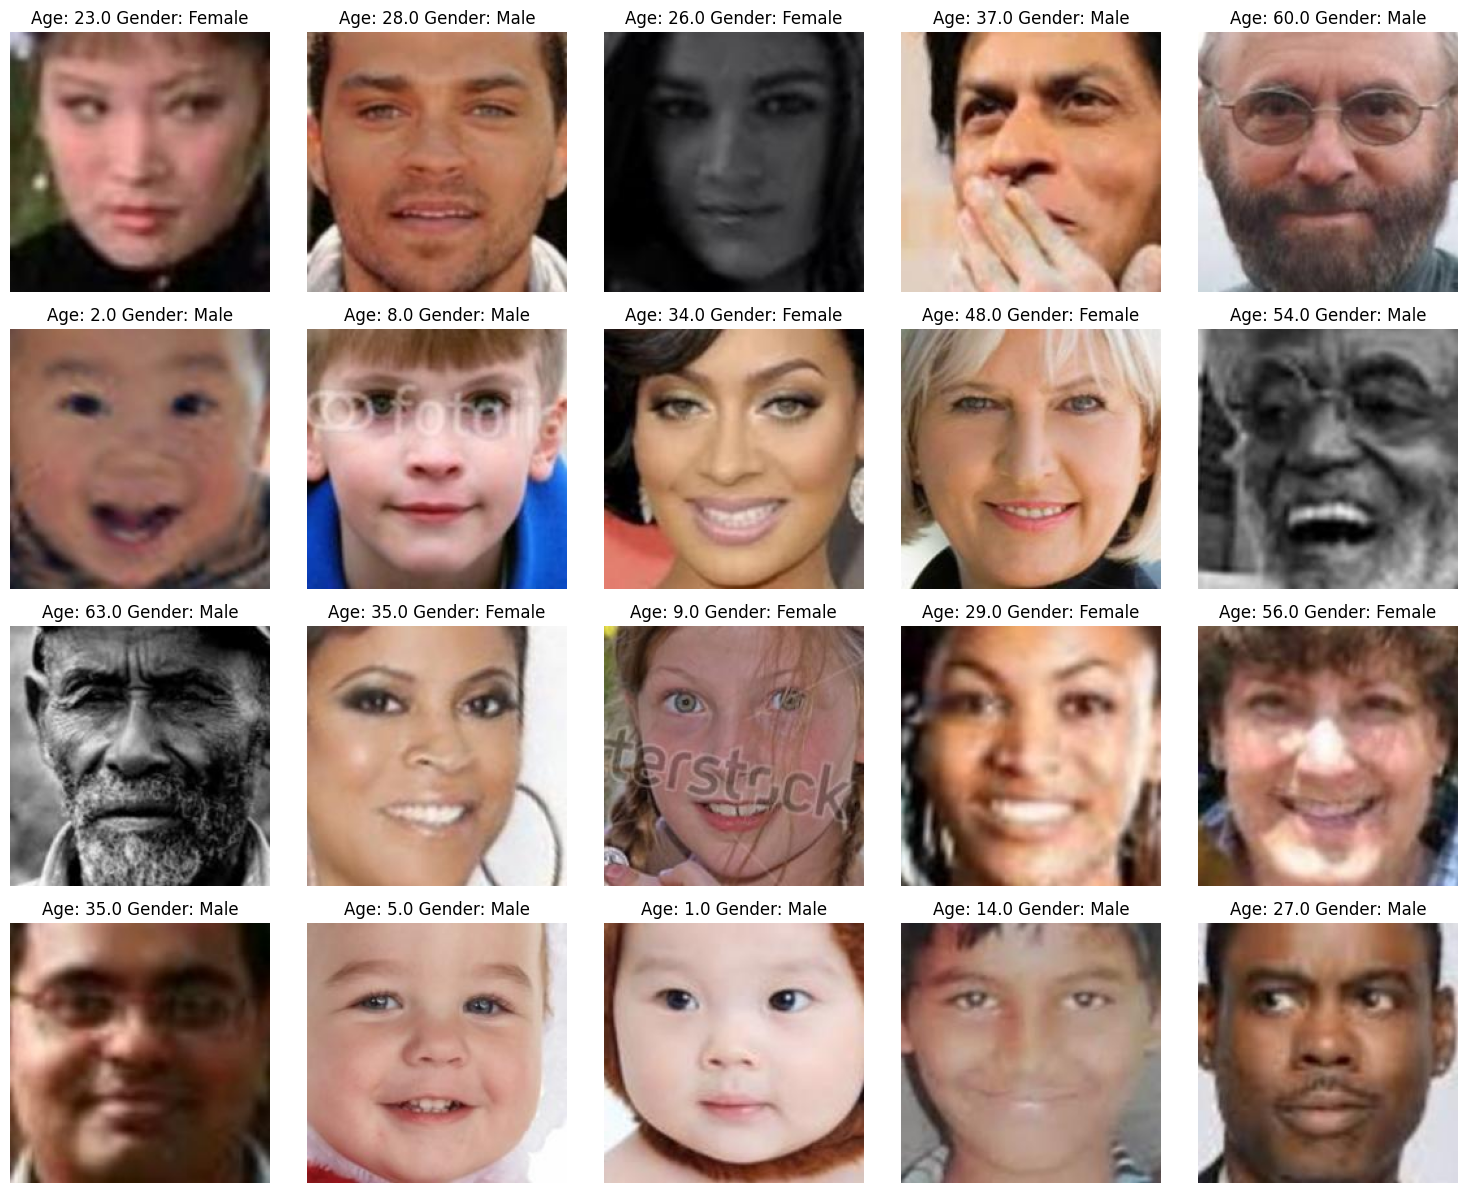

In [12]:
from tensorflow.keras.preprocessing.image import load_img

gender_dict = {0: 'Male', 1: 'Female'} # One hot encoding

files = df.iloc[0:20] # To extract first 20 rows

#Subplots  displaying the the output
plt.figure(figsize=(15, 15)) 
for index, (file, age, gender) in files.iterrows():
    plt.subplot(5, 5, index + 1)
    img = load_img("./UTKFace/" + file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.80, random_state=42)

train.head()

,image,age,gender
18199,78_1_1_20170113011857601.jpg.chip.jpg,78.0,1
19557,24_0_2_20170103223924087.jpg.chip.jpg,24.0,0
20132,34_1_3_20170119152405425.jpg.chip.jpg,34.0,1
11849,46_0_3_20170119183135878.jpg.chip.jpg,46.0,0
2100,30_0_2_20170116174814595.jpg.chip.jpg,30.0,0


In [14]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Training the model
x_train = []
for file in train.image:
    img = load_img("./UTKFace/"+file, color_mode='grayscale')
    img = img.resize((128,128), Image.LANCZOS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)


In [15]:
x_train.shape

(3556, 128, 128, 1)

In [16]:
x_train = x_train/255

In [17]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [25]:
y_gender.shape

(3556,)

In [27]:
y_age.shape

(3556,)

In [18]:
input_size = (128, 128, 1) # Height= 128, width= 128, no. of channels=1 as grayscale

# Create Convolutional Neural Network 

In [19]:

from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Model

inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X) # Batch Normalization
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

# Create the instance of the model
model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [20]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

# Count the total number of parameters in model

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

# Model Performance

In [22]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
320/320 [==============================] - 104s 319ms/step - loss: 16.4509 - gender_output_loss: 0.6788 - age_output_loss: 15.7722 - gender_output_accuracy: 0.6631 - age_output_accuracy: 0.0472 - val_loss: 21.9616 - val_gender_output_loss: 0.6245 - val_age_output_loss: 21.3371 - val_gender_output_accuracy: 0.7163 - val_age_output_accuracy: 0.0534
Epoch 2/20
320/320 [==============================] - 109s 341ms/step - loss: 12.9585 - gender_output_loss: 0.4792 - age_output_loss: 12.4794 - gender_output_accuracy: 0.7741 - age_output_accuracy: 0.0341 - val_loss: 20.4253 - val_gender_output_loss: 0.4498 - val_age_output_loss: 19.9755 - val_gender_output_accuracy: 0.7978 - val_age_output_accuracy: 0.0169
Epoch 3/20
320/320 [==============================] - 126s 393ms/step - loss: 11.1671 - gender_output_loss: 0.4002 - age_output_loss: 10.7670 - gender_output_accuracy: 0.8116 - age_output_accuracy: 0.0184 - val_loss: 14.6922 - val_gender_output_loss: 0.3447 - val_age_output_loss:

# Visualizing the Model Performance

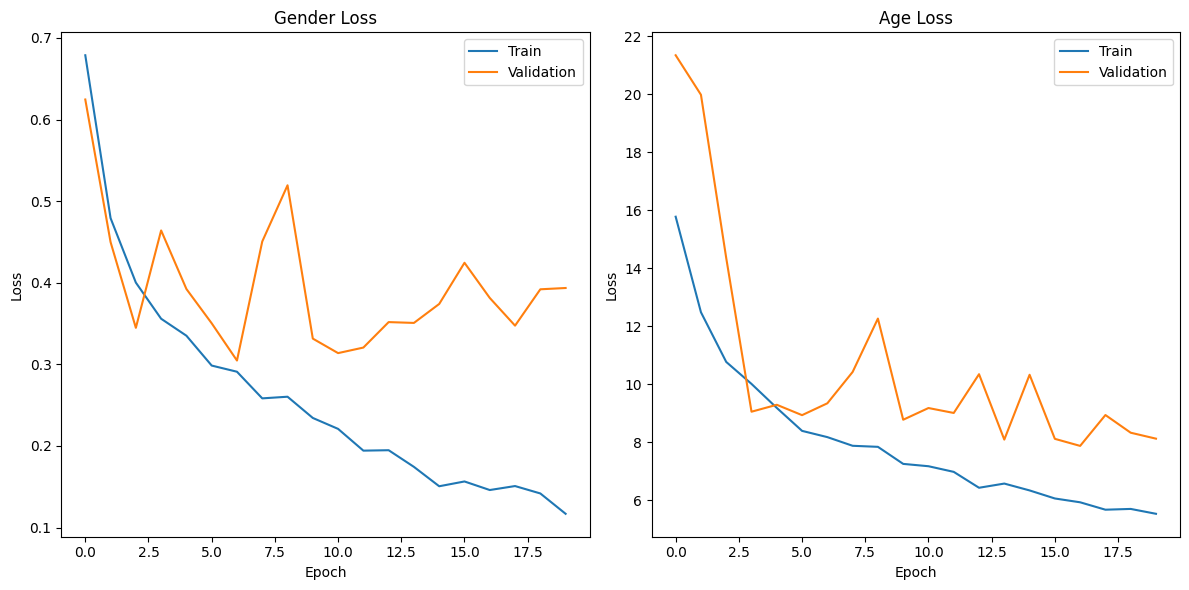

In [23]:
# Plotting gender and age losses together
plt.figure(figsize=(12, 6))

# Gender loss
plt.subplot(1, 2, 1)
plt.plot(model_history.history['gender_output_loss'], label='Train')
plt.plot(model_history.history['val_gender_output_loss'], label='Validation')
plt.title('Gender Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Age loss
plt.subplot(1, 2, 2)
plt.plot(model_history.history['age_output_loss'], label='Train')
plt.plot(model_history.history['val_age_output_loss'], label='Validation')
plt.title('Age Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Original: Gender =  Male  Age =  29.0
1/1 [==============================] - 0s 54ms/step
Prediction: Gender =  Male  Age =  30


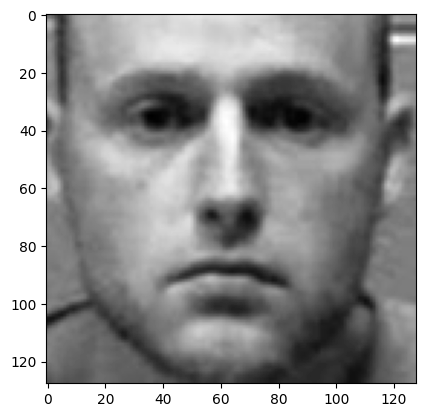

Original: Gender =  Female  Age =  23.0
1/1 [==============================] - 0s 35ms/step
Prediction: Gender =  Female  Age =  18


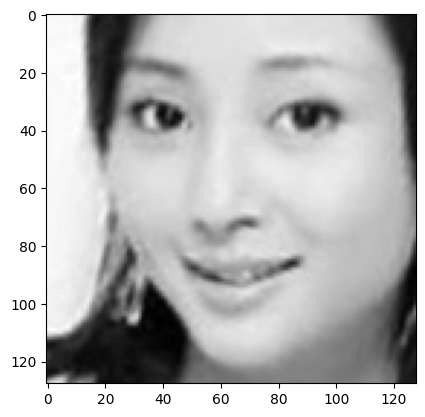

Original: Gender =  Female  Age =  35.0
1/1 [==============================] - 0s 53ms/step
Prediction: Gender =  Female  Age =  35


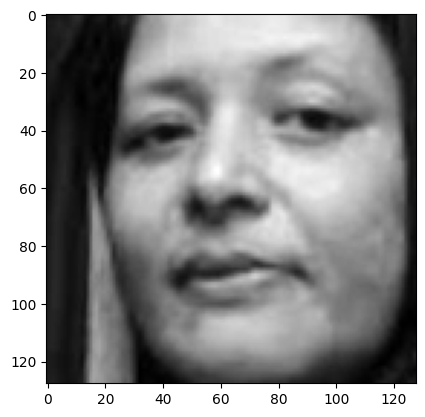

In [29]:
# Defining a function for predicting and visualizing multiple test images
def predict_and_visualize(index_list, x_test, y_gender_true, y_age_true, model, gender_dict):
    for index in index_list:
        print("Original: Gender = ", gender_dict[y_gender_true[index]], " Age = ", y_age_true[index])

        # Predict gender and age
        pred = model.predict(x_test[index].reshape(1, 128, 128, 1))
        pred_gender = gender_dict[round(pred[0][0][0])]
        pred_age = round(pred[1][0][0])

        print("Prediction: Gender = ", pred_gender, " Age = ", pred_age)

        # Display the image
        plt.imshow(x_test[index].reshape(128, 128), cmap='gray')
        plt.show()

# Example usage:
index_list = [55,63,20]  # List of indices of test images to predict and visualize
predict_and_visualize(index_list, x_train, y_gender, y_age, model, gender_dict)